# LINEAR REGRESSION

Linear regression is a type of statistical analysis used to predict the relationship between two variables. It assumes a linear relationship between the independent variable and the dependent variable, and aims to find the best-fitting line that describes the relationship. The line is determined by minimizing the sum of the squared differences between the predicted values and the actual values.

### Simple Linear Regression

The goal of the linear regression algorithm is to get the best values for B0 and B1 to find the best fit line. The best fit line is a line that has the least error which means the error between predicted values and actual values should be minimum.

In regression, the difference between the observed value of the dependent variable(yi) and the predicted value(predicted) is called the residuals.

Mathematically, the best fit line is obtained by minimizing the Residual Sum of Squares(RSS).

The cost function helps to work out the optimal values for B0 and B1, which provides the best fit line for the data points.

In Linear Regression, generally Mean Squared Error (MSE) and Root Mean Sqaured Error (RMSE) cost function is used, which is the average of squared error that occurred between the ypredicted and yi.

We calculate MSE using simple linear equation y=mx+b  

Generally the linear model makes prediction by simply computing the weighted sum of input features, plus the intercept term.

y_pred=B0+B1X1+B2X2+............+BnXn

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
X = 2*np.random.rand(100,1)
y = 4 + 3 * X +np.random.randn(100,1)

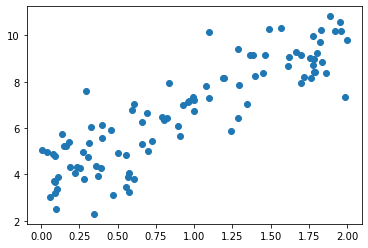

In [22]:
plt.scatter(X,y)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.7686240922376624

In [34]:
reg.coef_     #slope (B1)

array([[3.08771556]])

In [35]:
reg.intercept_  #Intercept(B0)

array([3.79366221])

In [38]:
X_new=np.array([[0],[2]])
y_pred=reg.predict(X_new)
y_pred

array([[3.79366221],
       [9.96909333]])

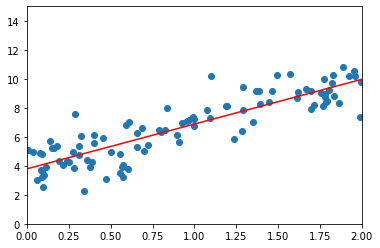

In [44]:
plt.plot(X_new,y_pred,"r-")
plt.scatter(X,y)
plt.axis([0,2,0,15])
plt.show()

This SVD approach of Scikit learn is O(n^2) The computation to train is very high and time it takes is slow. Once trained the predictions are fast.

Computational complexity is linear for no.of features and no.of predictions to make.

So far we looked for a single feature if there are multiple features and we need to reduce the cost function we use the Gradient Descent Approach.

y_pred=B0+B1X1+B2X2+............+BnXn

### Gradient Descent for Linear Regression

Using the cost function, we’ll update the values of B0 and B1 such that the MSE value settles at the minima. There are 3 methods to find the minimum value using Gradient descent method. 1)Batch GD 2)Mini-Batch GD and 3) Stochastic GD 

Gradient Descent is one of the optimization algorithms that optimize the cost function(objective function) to reach the optimal minimal solution. To find the optimum solution we need to reduce the cost function(MSE) for all data points. This is done by updating the values of B0 and B1 iteratively until we get an optimal solution.

Optimal Cost function (B0 and B1) reduces the MSE/RSE which provides best fit line. To find optimal cost function GD

At first we will initialize the cost function to random and then using LEARNING RATE we will decrease cost function and make algorithm converge to minimum.

Now we see the cost function for every Theta(B) value to attain minimum error

When we plot cost(y-axis) v/s Theta(X-axis) points using the learning rate we need to identify the global minimum(the least minimum) than the local minimum(second least min). 

MSE model has the convex function which helps to get global minima, where it does not allow any 2 points on the curve of the cost v/s theta graph to cross.

Having same scale in the features helps to get to the minima easily. If features scaled the minimum points reach easily else (features not scaled): it takes a elongated bowl shape making it take more time to reach minimum.

Batch GD: Uses the whole training set to compute gradients at each step and hence it is slow when train set is huge.

SGD: Takes random single instance from the training set to compute gradients. The cost functions bounces up and down so when algorithm stops the parameters are good but not best. It has a chance of getting global minima. SGB better than BatchGD

Randomness is good but algo cannot settle to min value. So we can gradually reduce the 'Learning Rate'. Start with large Learning Rate and then make it smaller and smaller to reach the global minima. The LR is determined by learning schedule.

MiniBatchGD: Computes gradients on small sets of instances called mini-batch. It also gets advantage from GPU's. MiniBatchGD would be almost near to the params predicted by SGD.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


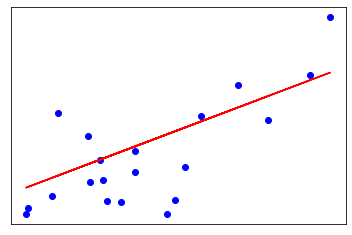

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="blue")
plt.plot(diabetes_X_test, diabetes_y_pred, color="red")
plt.xticks(())
plt.yticks(())

plt.show()

## Multiple Linear Regression

In multiple linear regression, each independent variable has its own slope coefficient, representing the change in the dependent variable for a one-unit change in that specific independent variable while holding other independent variables constant. These coefficients allow us to assess the individual impact of each independent variable on the dependent variable while controlling for other factors.

Multiple linear regression is useful in situations where multiple factors can potentially influence the dependent variable simultaneously. It allows for a more comprehensive analysis of the relationships between variables and provides insights into how different independent variables contribute to the variation in the dependent variable.

The interpretation of the coefficients in multiple linear regression is crucial. The magnitude and sign of each coefficient indicate the direction and strength of the relationship between the corresponding independent variable and the dependent variable. Additionally, statistical tests and measures, such as the adjusted R-squared, F-test, and t-tests, can be used to assess the overall significance and goodness-of-fit of the multiple linear regression model.

## Polynomial Linear Regression

If data is more complex than a straight line, then we can use linear model to fit non-linear data by adding the polynomial degree (squares/cube/nth degree as a feature to the existing features) This is Polynomial Linear Regression.

In [131]:
import numpy as np
import matplotlib.pyplot as plt
m=100
X=6*np.random.rand(m,1) - 3
y=0.5*X**2+X+2+np.random.randn(m,1)

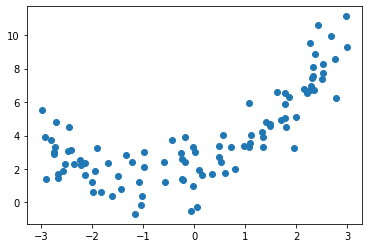

In [132]:
plt.scatter(X,y)
plt.show()

In [133]:
from sklearn.preprocessing import PolynomialFeatures
poly_f=PolynomialFeatures(degree=2)
X_poly=poly_f.fit_transform(X)
print('X[0]:',X[0])
print('X_poly[0]:',X_poly[0])

X[0]: [0.4823593]
X_poly[0]: [1.         0.4823593  0.23267049]


In [125]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly,y)
reg.intercept_,reg.coef_

(array([1.91383741]), array([[0.        , 1.04821456, 0.49171758]]))

In [126]:
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_f.transform(X_new)
y_new = reg.predict(X_new_poly)

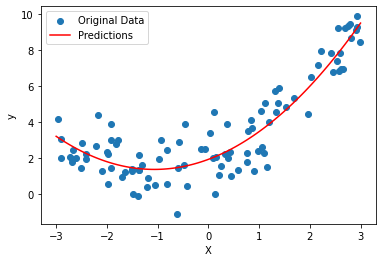

In [127]:
plt.scatter(X, y, label='Original Data')
plt.plot(X_new, y_new, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

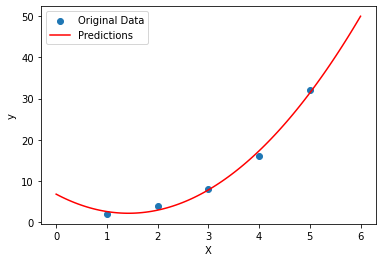

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some example data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 8, 16, 32])

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for new values
X_new = np.linspace(0, 6, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the original data and predictions
plt.scatter(X, y, label='Original Data')
plt.plot(X_new, y_new, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()